# MANUAL NET ARCHITECTURE

In [1]:
import tensorflow
import tensorflow as tf
print(tf.__version__)

import os 
import glob
from PIL import Image
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation

2.12.0


In [2]:
benign = 'Dataset/benign'
malignant = 'Dataset/malignant'
normal = 'Dataset/normal'

In [3]:
def plot_images(item_dir, n=6):
    all_item_dir = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dir][:n]
    
    plt.figure(figsize=(80, 40))
    for idx, img_path in enumerate(item_files):
        plt.subplot(3, n, idx+1)
        img = plt.imread(img_path)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    
    plt.tight_layout()
    
def image_details_print(data,path):
    print('======== Images in: ', path)
    for key,values in data.items():
        print(key,':\t', values)


def images_details(path):
    files=[f for f in glob.glob(path + "**/*.*", recursive=True)]
    data={}
    data['Images_count']=len(files)
    data['Min_width']=10**100
    data['Max_width']=0
    data['Min_height']=10**100
    data['Max_height']=0
    
    for f in files:
        img=Image.open(f)
        width,height=img.size
        data['Min_width']=min(width,data['Min_width'])
        data['Max_width']=max(width, data['Max_width'])
        data['Min_height']=min(height, data['Min_height'])
        data['Max_height']=max(height, data['Max_height'])
        
    image_details_print(data,path)


TRAINING DATA FOR BENIGN:

======== Images in:  Dataset/benign
Images_count :	 150
Min_width :	 315
Max_width :	 893
Min_height :	 338
Max_height :	 719



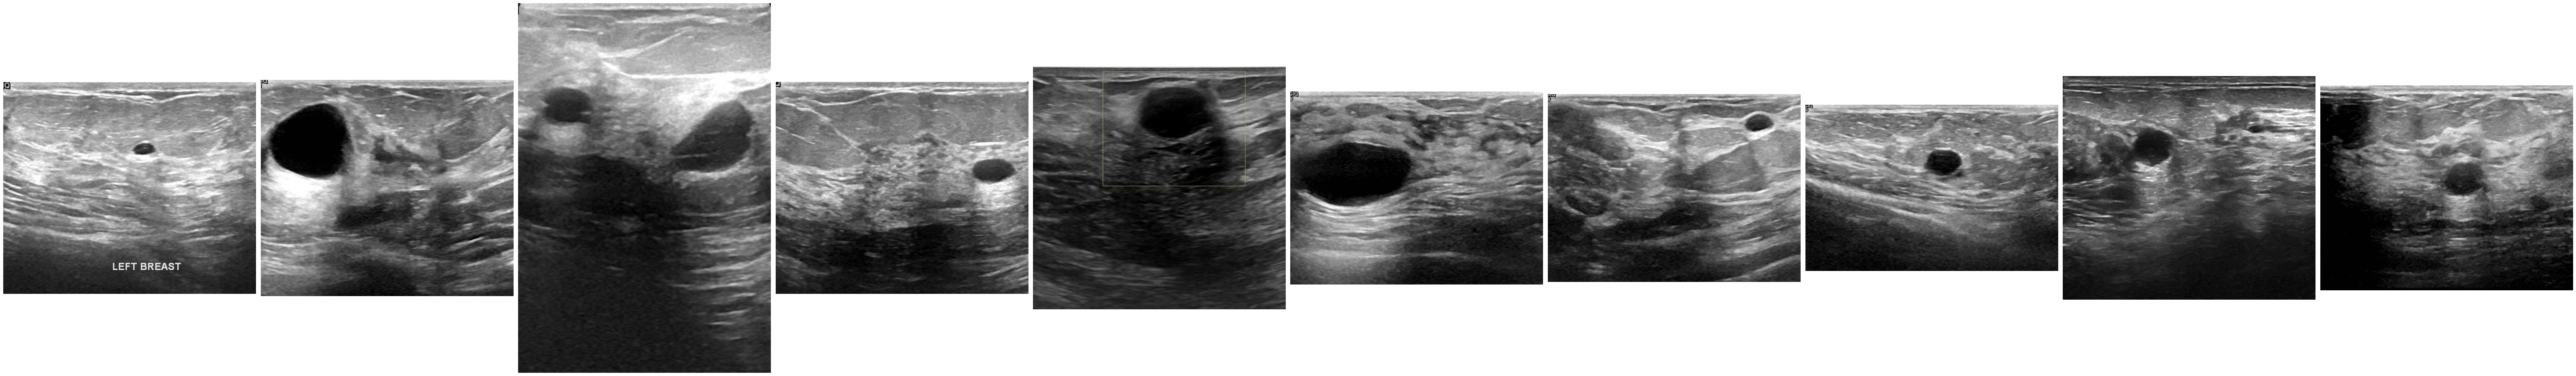

In [4]:
print("")
print("TRAINING DATA FOR BENIGN:")
print("")
images_details(benign)
print("")
plot_images(benign, 10) 


TRAINING DATA FOR MALIGNANT:

======== Images in:  Dataset/malignant
Images_count :	 150
Min_width :	 128
Max_width :	 128
Min_height :	 128
Max_height :	 128



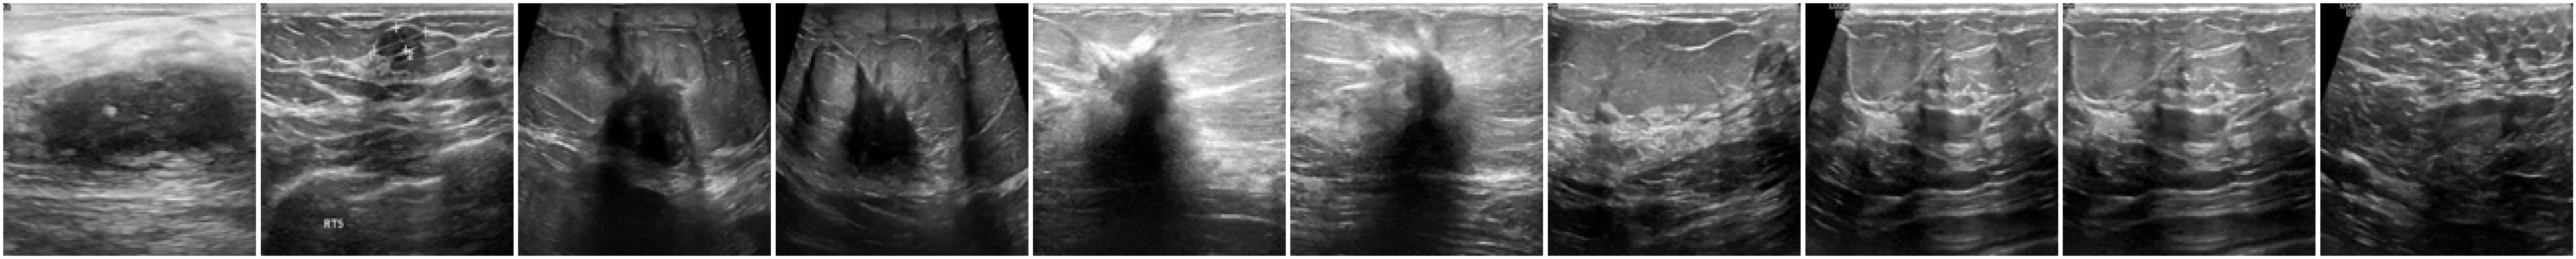

In [5]:
print("")
print("TRAINING DATA FOR MALIGNANT:")
print("")
images_details(malignant)
print("")
plot_images(malignant, 10)


TRAINING DATA FOR NORMAL:

======== Images in:  Dataset/normal
Images_count :	 133
Min_width :	 128
Max_width :	 128
Min_height :	 128
Max_height :	 128



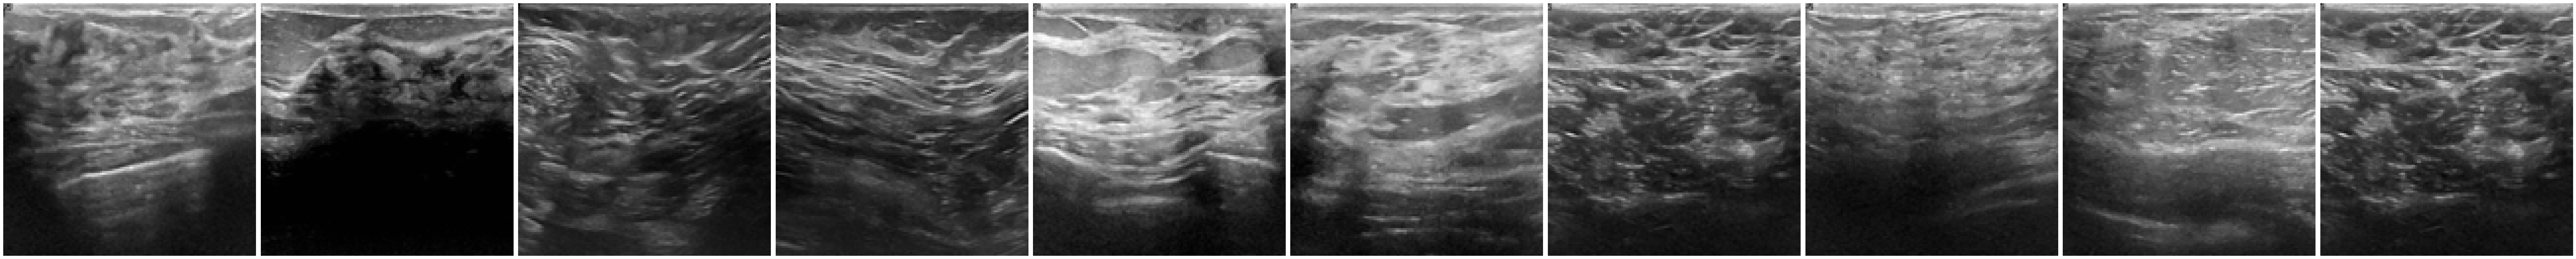

In [6]:
print("")
print("TRAINING DATA FOR NORMAL:")
print("")
images_details(normal)
print("")
plot_images(normal, 10)

In [7]:
# Define the path to your dataset directory
dataset_dir = 'Dataset'

# Set the batch size and number of classes
batch_size = 64
num_classes = 4

In [8]:
# Create an ImageDataGenerator for data augmentation and preprocessing

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2)

In [9]:
# Load and preprocess the dataset using the ImageDataGenerator

train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

Found 347 images belonging to 3 classes.


In [10]:
validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')


Found 86 images belonging to 3 classes.


In [11]:
MODEL=Sequential()
MODEL.add(Convolution2D(32,(3,3),input_shape=(224,224,3),activation='relu'))
MODEL.add(MaxPooling2D(pool_size=(2,2)))
MODEL.add(Flatten())
MODEL.add(Dense(3, activation='softmax'))
MODEL.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
epochs = 10

In [13]:
history = MODEL.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs # Add the callbacks here
)

Epoch 1/10
6/6 [==============================] - 9s 1s/step - loss: 35.6566 - accuracy: 0.3689 - val_loss: 15.2331 - val_accuracy: 0.3023
Epoch 2/10
6/6 [==============================] - 8s 1s/step - loss: 10.2539 - accuracy: 0.3545 - val_loss: 4.7253 - val_accuracy: 0.3721
Epoch 3/10
6/6 [==============================] - 8s 1s/step - loss: 3.6652 - accuracy: 0.4121 - val_loss: 2.8000 - val_accuracy: 0.3721
Epoch 4/10
6/6 [==============================] - 8s 1s/step - loss: 2.1171 - accuracy: 0.4726 - val_loss: 2.0148 - val_accuracy: 0.4651
Epoch 5/10
6/6 [==============================] - 8s 1s/step - loss: 1.4478 - accuracy: 0.5072 - val_loss: 1.0906 - val_accuracy: 0.4651
Epoch 6/10
6/6 [==============================] - 8s 1s/step - loss: 1.3263 - accuracy: 0.4092 - val_loss: 0.9994 - val_accuracy: 0.5000
Epoch 7/10
6/6 [==============================] - 9s 1s/step - loss: 0.9386 - accuracy: 0.5591 - val_loss: 0.9960 - val_accuracy: 0.4767
Epoch 8/10
6/6 [======================

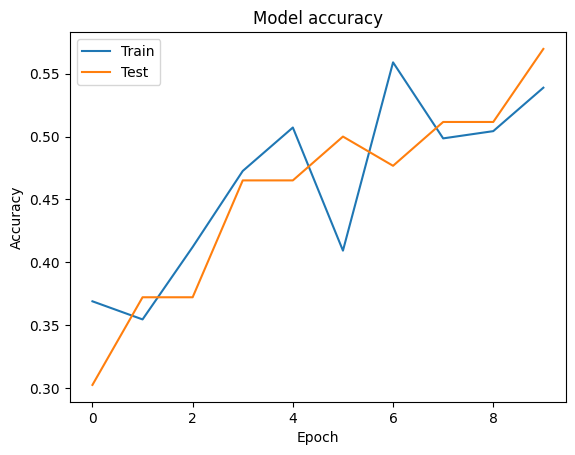

In [14]:
import matplotlib.pyplot as plt

def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

graph()

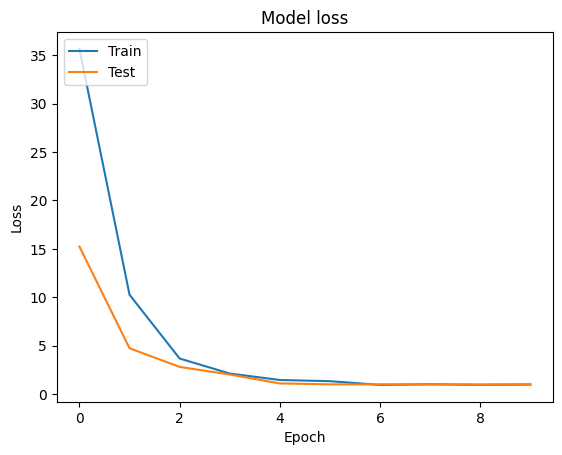

In [15]:
import matplotlib.pyplot as plt

def graph():
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
graph()